# K-Means Clustering Algorithm

__Purpose:__
The purpose of this lecture is to learn how to use an unsupervised learning algorithm, **K-means**. We will learn how to run this algorithm using sklearn.   

__At the end of this lecture you will be able to:__
> 1. Run a K-means algorithm.
> 2. Understand what parameters are customizable for the algorithm.
> 3. Know how to use the inertia curve to determine the optimal number of clusters.

### K-Means Overview

**K-means** is one of the most basic clustering algorithms.  It relies on finding cluster centers to group data points based on minimizing the sum of squared errors between each datapoint and its cluster center.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [6,6]

K-means clustering is one of the most simple clustering algorithms.  One of the limitations is that it depends on the starting point of the clusters, and the number of clusters need to be defined beforehand.

### Cluster starting points
Let's start by creating a simple dataset.

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

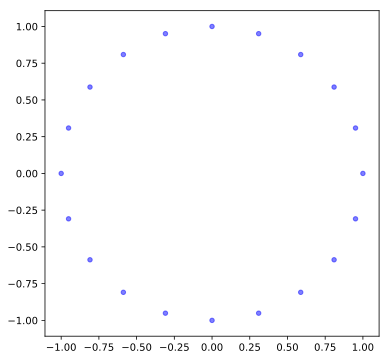

In [4]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

Let's now group this data into two clusters.  We will use two different random states to initialize the algorithm. 

Clustering with a random state of 10:

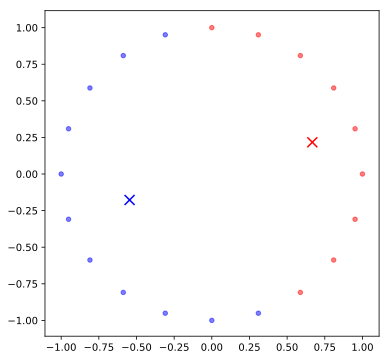

In [5]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

Clustering with a random state of 20:

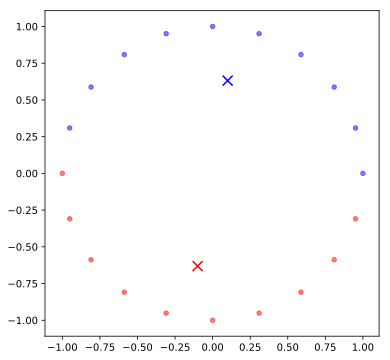

In [6]:
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1)
km.fit(X)
display_cluster(X,km,num_clusters)

Why are the clusters different when we run  the K-means twice?

It's because the starting points of the cluster centers have an impact on where the final clusters lie.  The starting point of the clusters is controlled by the random state.

### Determining optimium number of clusters

Let's create a new dataset that visually consists on a few clusters and try to group them.

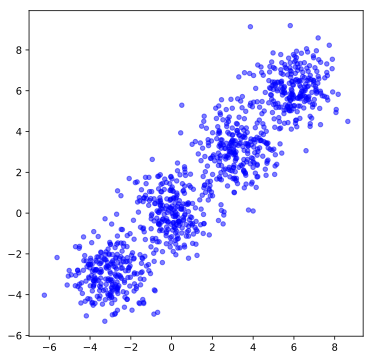

In [7]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

How many clusters do you observe?

Let's run K-means with seven clusters.

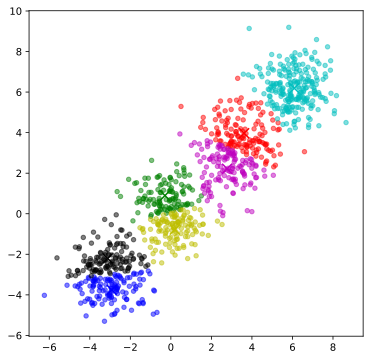

In [8]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

Now let's re-run the algorithm with four clusters.

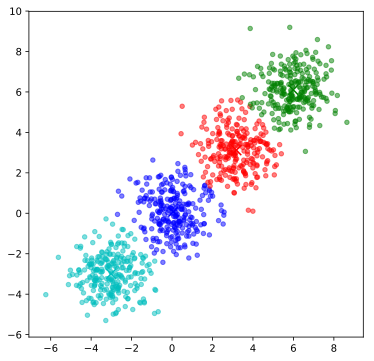

In [9]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

Should we use four or seven clusters?  

In this case it may be visually obvious that four clusters is better than seven.  This is because we can easily view the data in two dimensional space.  However, real world data usually has more than two dimensions.  A dataset with a higher dimensional space is hard to visualize.  A way of solving this is to plot the inertia (sum of squared error between each point and its cluster center) as a function of the number of clusters. 

In [10]:
km.inertia_

1880.174402277563

### Problem 1:

Write code that calculates the inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters.

In [11]:
### Write code here




Where does the elbow of the curve occur?

What do you think the inertia would be if you have the same number of clusters and data points?

### Clustering colors from an image

Let's start by loading an image.

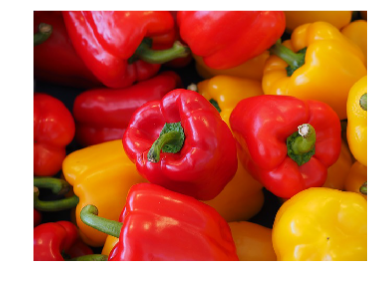

In [12]:
img = plt.imread('peppers.jpg')
plt.imshow(img)
plt.axis('off');

In [13]:
img.shape

(480, 640, 3)

The image above has 480 pixels in height and 640 pixels in width.  Each pixel has 3 values that represent how much red, green and blue it has. Below you can play with different combinations of RGB to create different colors. In total, you can create $256^3 = 16,777,216$ unique colors.

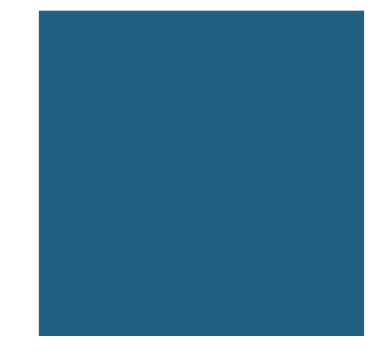

In [14]:
# assign values for the RGB.  Each value should be between 0 and 255
R = 35
G = 95
B = 131

plt.imshow([[np.array([R,G,B]).astype('uint8')]])
plt.axis('off');

First we will reshape the image into a table that has a pixel per row and each column represents the red, green and blue channels.

In [15]:
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
img_flat[:5,:]

array([[15, 18, 25],
       [26, 16, 24],
       [42, 15, 22],
       [65, 16, 22],
       [85, 14, 22]], dtype=uint8)

Since there are 480x640 pixels we get 307,200 rows! 

In [16]:
img_flat.shape

(307200, 3)

Let's run K-means with 8 clusters.

In [17]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(img_flat)

Now let's replace each row with its closest cluster center.

In [18]:
img_flat2 = img_flat.copy()

# loops for each cluster center
for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

We now need to reshape the the data from 307,200 x 3 to 480 x 640 x 3

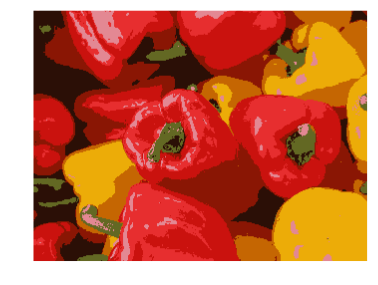

In [19]:
img2 = img_flat2.reshape(img.shape)

plt.imshow(img2)
plt.axis('off');

### Problem 2:
Write a function that receives the image and number of clusters (k), and returns (1) the image quantized into k colors, and (2) the inertia.

In [20]:
def image_cluster(img,k):
    ### Write code here
    
    
    return img2, kmeans.inertia_

### Problem 3:

Call the function for k between 2 and 20, and draw an inertia curve.

What is the optimum number of clusters?

In [21]:
### Write code here




Sometimes the elbow method does not work as expected.  There are alternatives such as the [silhouette coefficient] (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html).

#### NOTE: normalizing the features can also affect the way the clusters are created.

### Problem 4:
Plot in a grid all the images for the different k values.

In [ ]:
### Write code here


